Decision Tree

Tiatnic Survival Dataset

In [3]:
#Import the Necessary Libraries
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
#Load the data sets- train and test 

df=pd.read_csv('train_titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [9]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

<Axes: xlabel='Embarked', ylabel='count'>

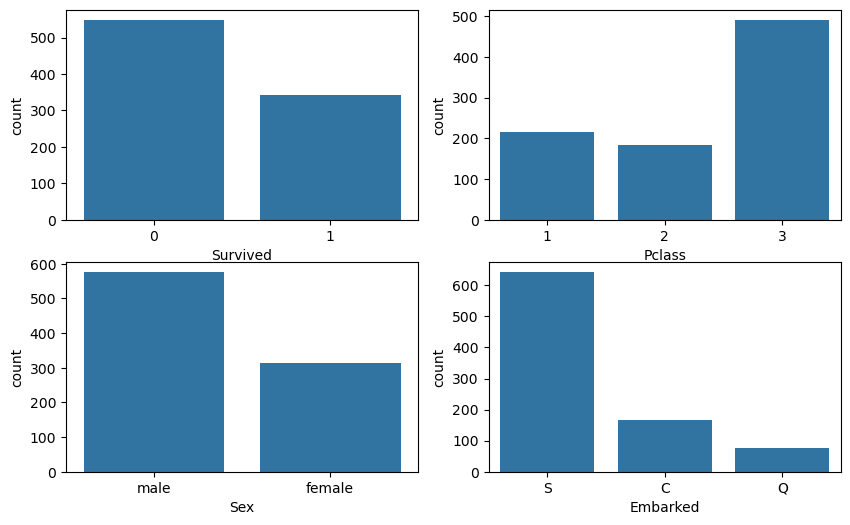

In [11]:
#Barchart of Survived, Pclass, Sex, Embarked
import seaborn as sns
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.countplot(x='Survived',data=df)

plt.subplot(2,2,2)
sns.countplot(x='Pclass',data=df)

plt.subplot(2,2,3)
sns.countplot(x='Sex', data=df)

plt.subplot(2,2,4)
sns.countplot(x='Embarked',data=df)

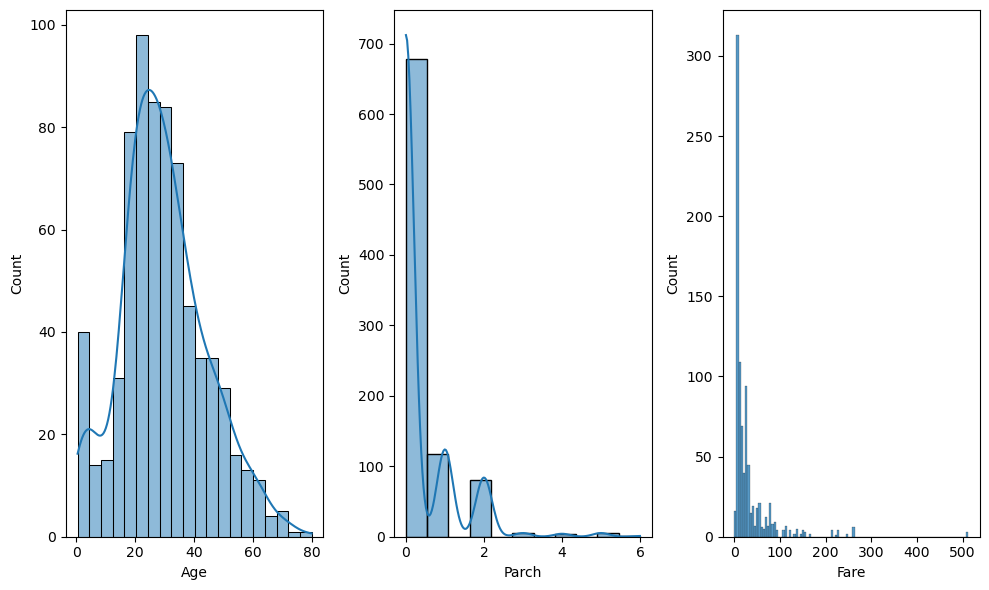

In [13]:
#Histogram of Age, Parch, Fare

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
sns.histplot(df['Age'].dropna(),kde=True)

plt.subplot(1,3,2)
sns.histplot(df['Parch'].dropna(), kde=True)

plt.subplot(1,3,3)
sns.histplot(df['Fare'].dropna())
plt.tight_layout()




<Axes: xlabel='Age', ylabel='Count'>

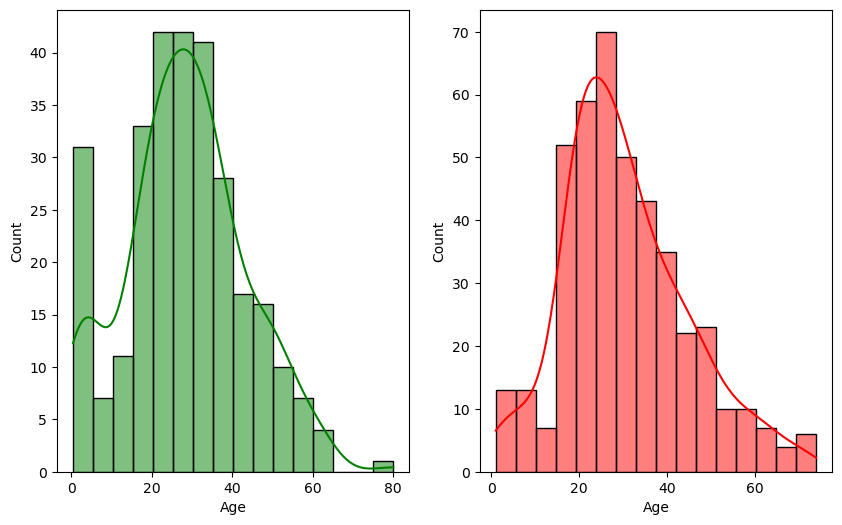

In [15]:
#Plot histogram of age for survived and did not survived class
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(df[df['Survived']==1]['Age'].dropna(), color='green',label="surived",kde=True)

plt.subplot(1,2,2)
sns.histplot(df[df['Survived']==0]['Age'].dropna(), color='red', label='not Survived',kde=True)






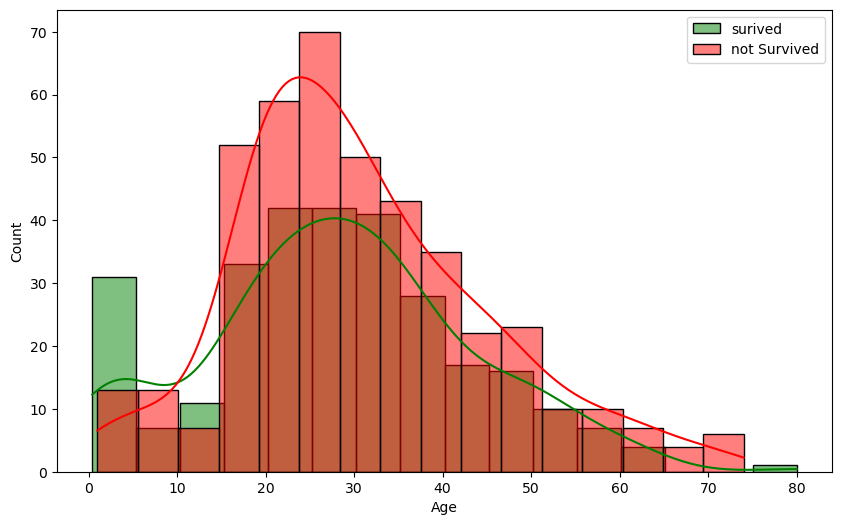

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Survived']==1]['Age'].dropna(), color='green',label="surived",kde=True)

sns.histplot(df[df['Survived']==0]['Age'].dropna(), color='red', label='not Survived',kde=True)
plt.legend()




Text(0.5, 1.0, 'Survival rate by class and Gender')

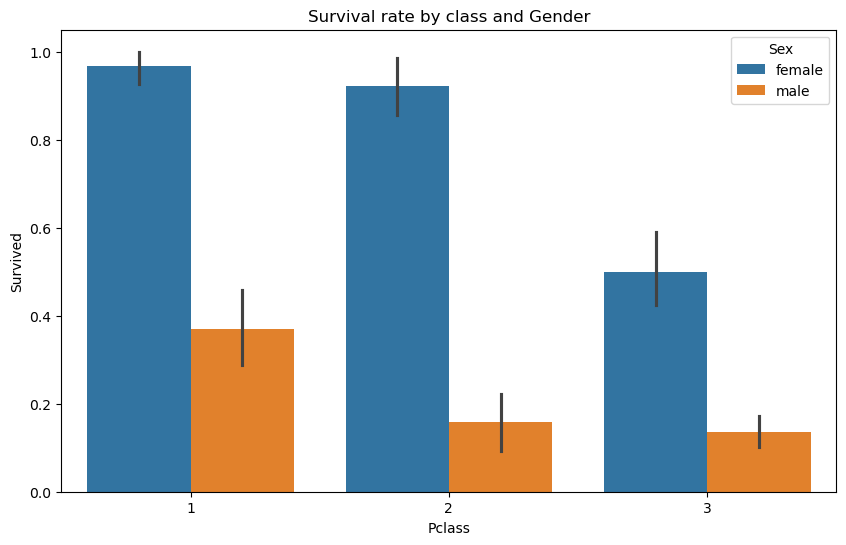

In [19]:
#Count class and geder wise survival rate - plot with appropriate chart


plt.figure(figsize=(10,6))
sns.barplot(x='Pclass' ,y='Survived',hue='Sex',data=df)
plt.title("Survival rate by class and Gender")




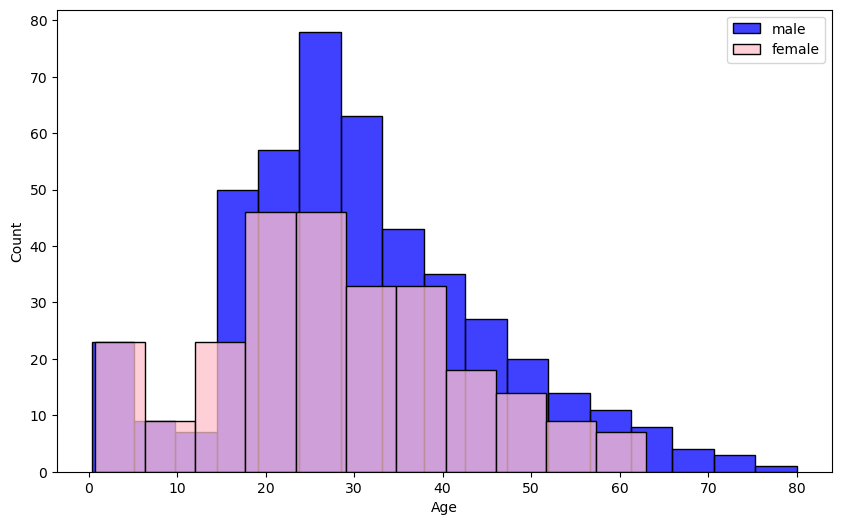

In [145]:
#Age wise Distribution of Male and Female passengers

plt.figure(figsize=(10,6))

sns.histplot(df[df['Sex']=='male']['Age'].dropna(), color='blue', label='male')

sns.histplot(df[df['Sex']=='female']['Age'].dropna(), color='pink', label='female')
plt.legend()


Text(0.5, 0, 'age')

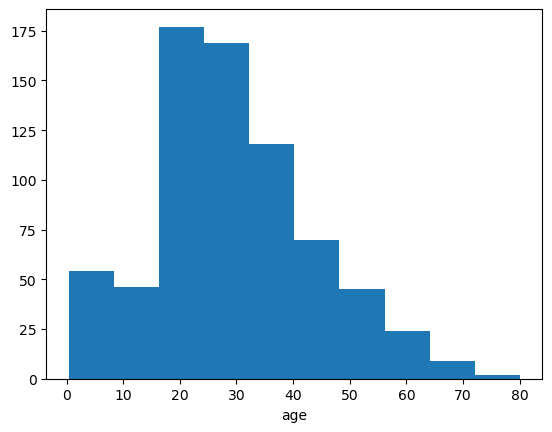

In [21]:
#Histogram of Age of the given data set(sample)

plt.hist(df['Age'])
plt.xlabel('age')


## Handling Missing Values

In [67]:
#Replace the msiing values in Embarked column by 'S'

df['Embarked'].fillna('S', inplace=True)


/tmp/ipykernel_4957/1809818780.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [69]:
#Impute the missing values in Fare column with median value

df['Fare'].fillna(df['Fare'].median(),inplace=True)


/tmp/ipykernel_4957/1583383414.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace=True)


In [71]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

import numpy as np

mean_age=df['Age'].mean()

std_age=df['Age'].std()

df['Age'].fillna(np.random.normal(mean_age,std_age),inplace=True)




/tmp/ipykernel_4957/3326352046.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(np.random.normal(mean_age,std_age),inplace=True)


## Feature Engineering - Creating new features

In [73]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df['FamilySize']=df['Parch']+df['Parch']+1

In [75]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df['IsAlone']=df['FamilySize']==1

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [147]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [143]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,True,True,False,True
1,1,38.0,1,0,71.2833,1,True,False,False,False
2,3,26.0,0,0,7.9250,1,True,False,False,True
3,1,35.0,1,0,53.1000,1,True,False,False,True
4,3,35.0,0,0,8.0500,1,True,True,False,True


## Model Building

In [281]:
df=pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [285]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [287]:
df['Age'].fillna(df['Age'].median(), inplace=True)  
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_4957/3027892191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_4957/3027892191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [289]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [291]:
#categorical data
from sklearn.preprocessing  import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  


In [293]:
from sklearn.preprocessing  import LabelEncoder

label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  


In [295]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [297]:
#Prepare X and y
X=df.drop('Survived', axis=1)
y=df['Survived']


In [299]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [251]:
# Label encoding of categorical features
#onehot encoding
df=pd.get_dummies(X,columns=['Sex','Embarked'],drop_first=True)



In [207]:
# concat df_categorical with original df
X_final=pd.concat([X,X_label], axis=1)

df.head()



,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


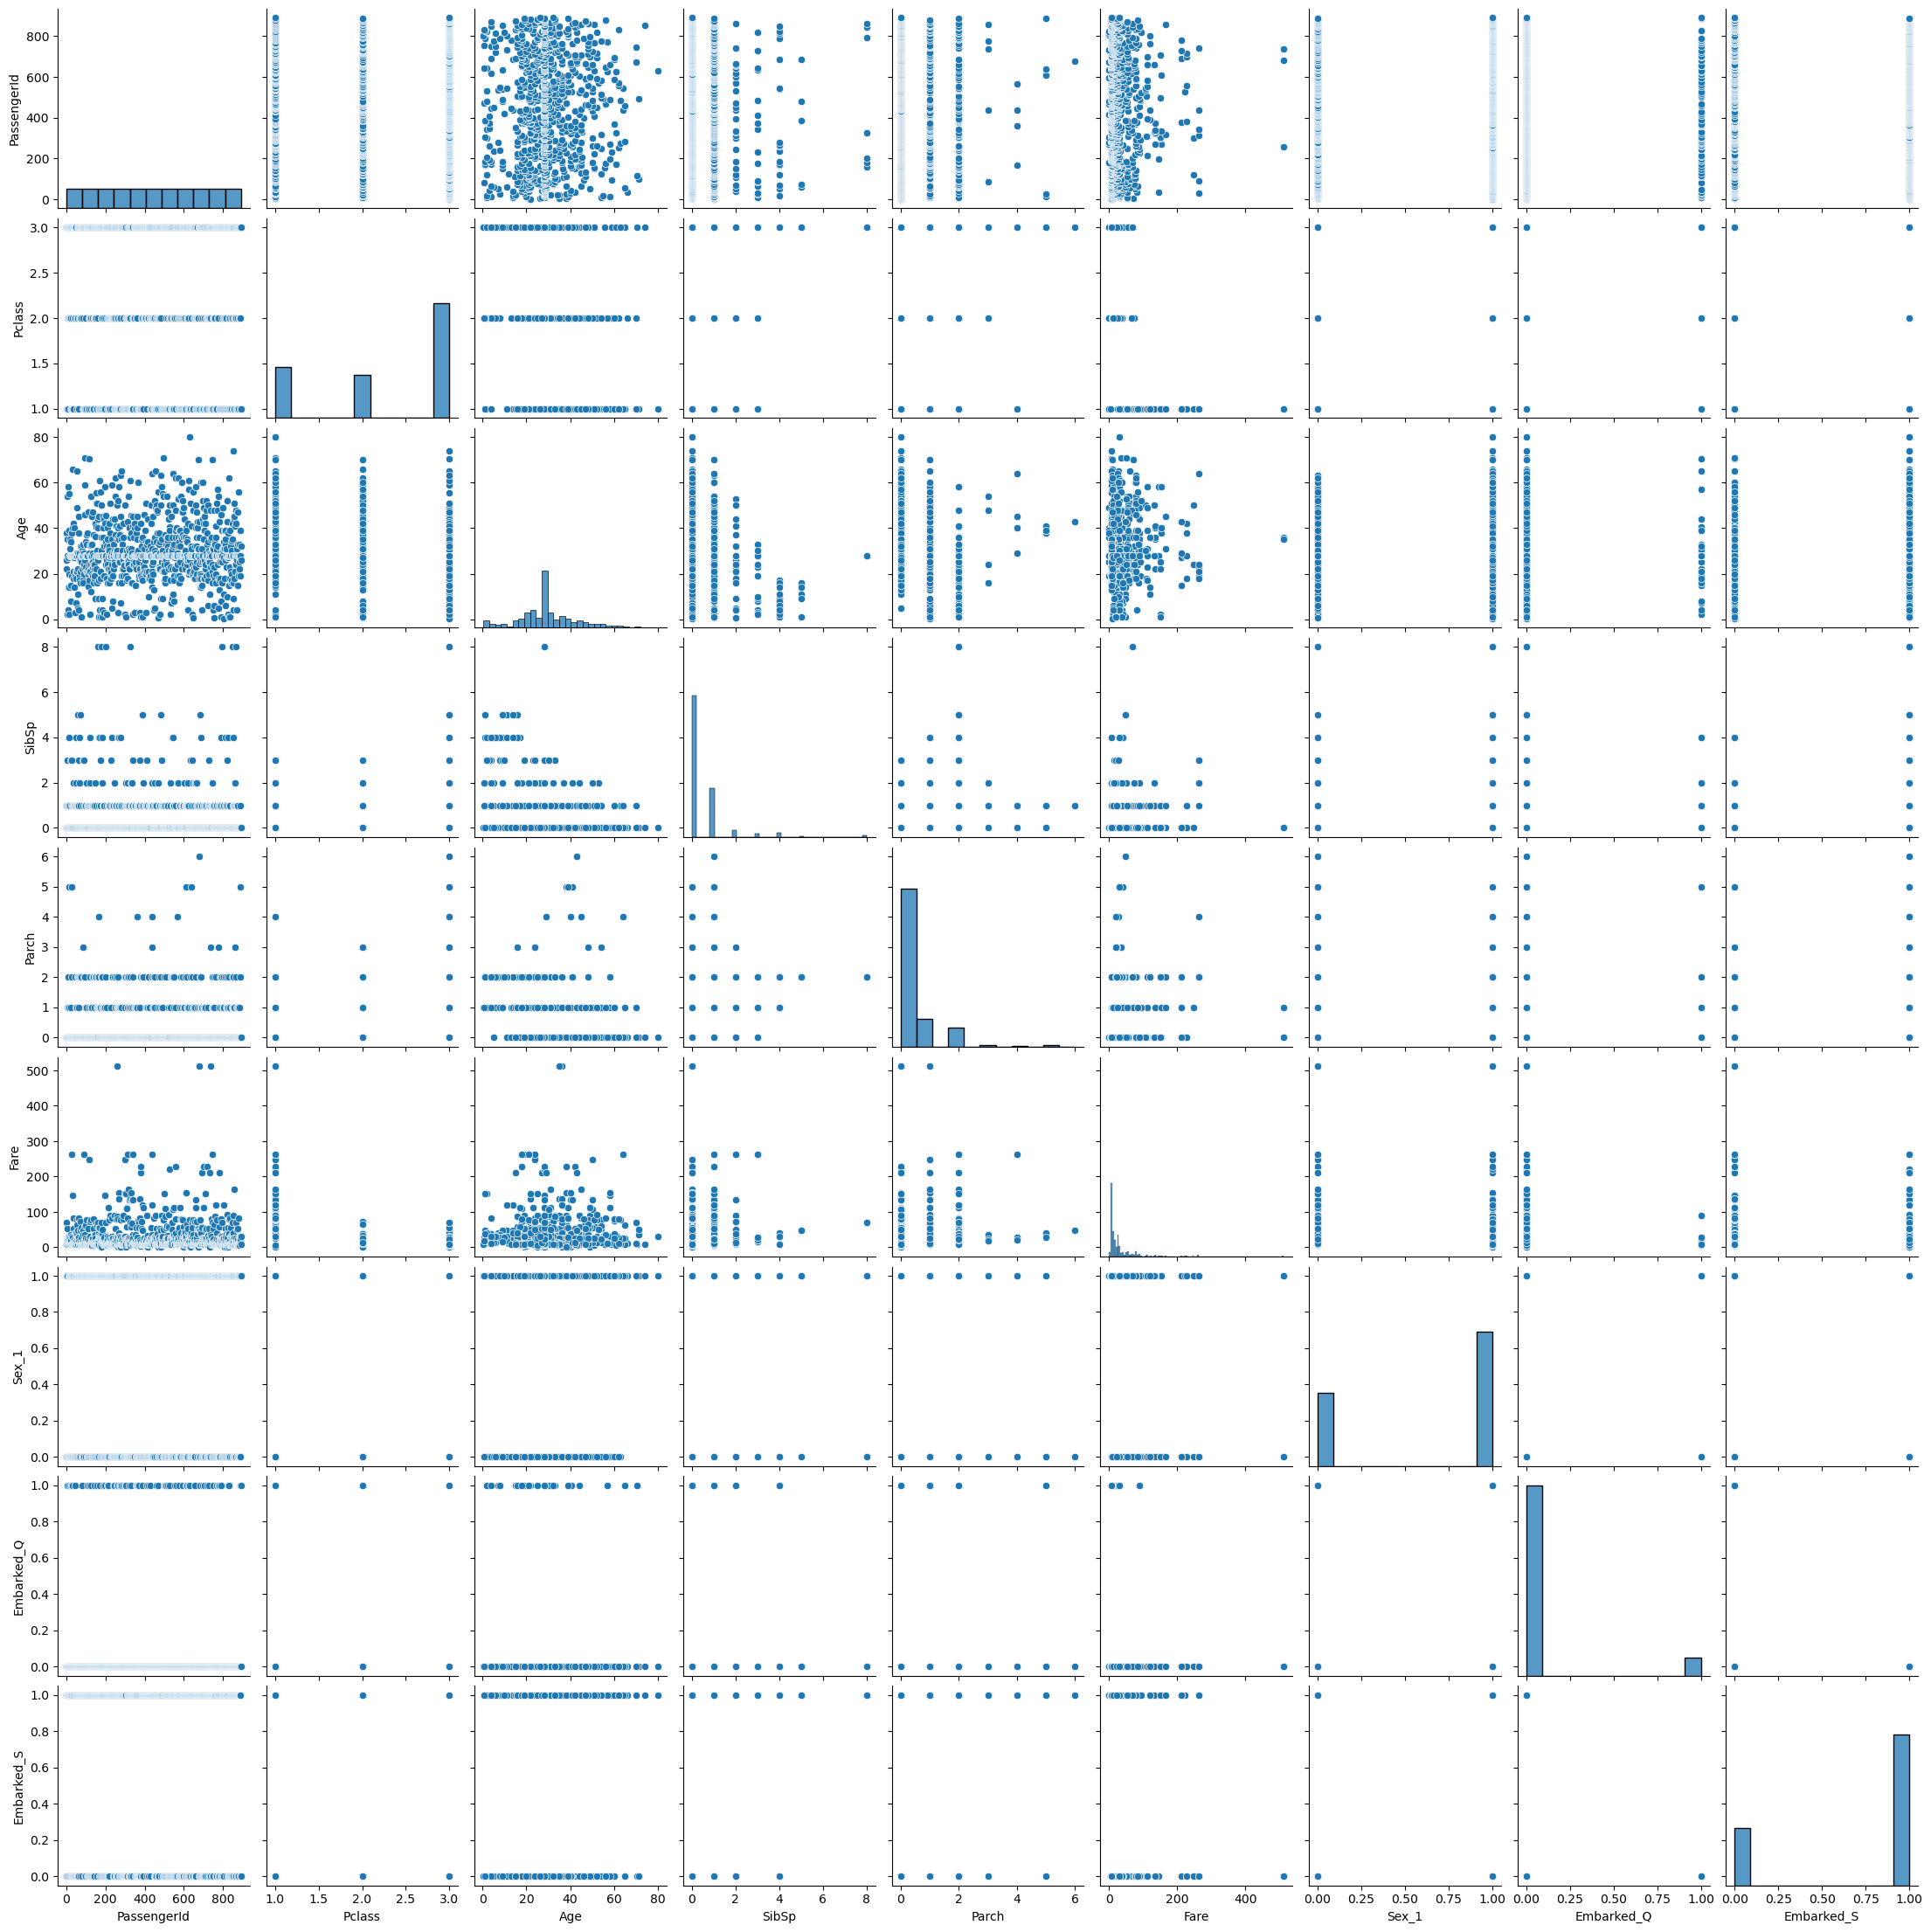

In [171]:
#Do a pairplot of all features
sns.pairplot(df)


In [279]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [309]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)



In [315]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
#Print the tree

# Importing required packages for visualization



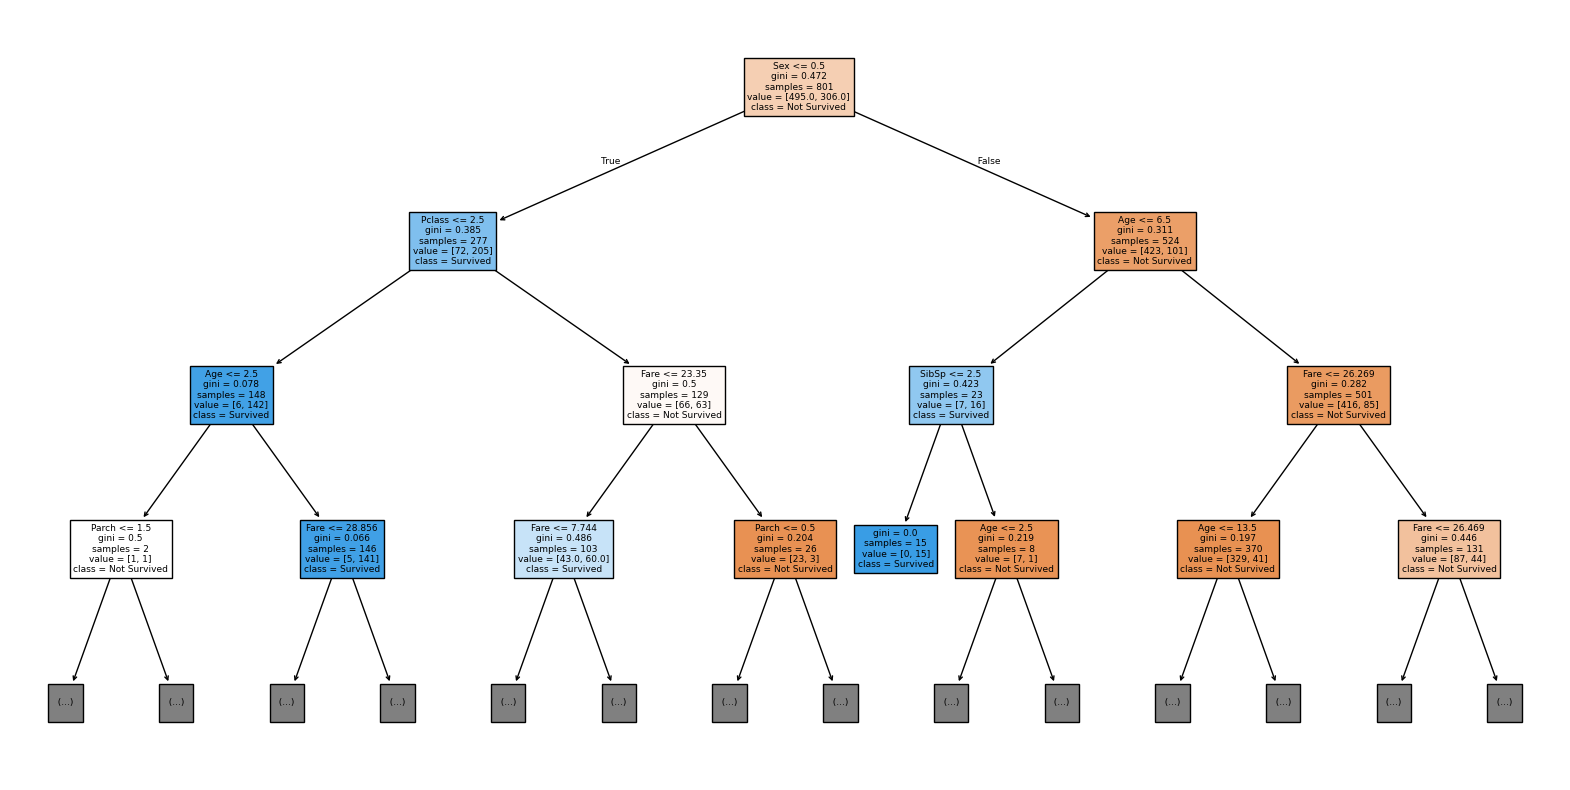

In [390]:
# plotting tree with max_depth=3

plt.figure(figsize=(20,10))
plot_tree(model,filled=True,feature_names=X.columns,class_names=['Not Survived','Survived'],max_depth=3)
plt.show()


<img src="tree2.png">

In [362]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score


# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

y_pred=model.predict(X_test)

print("Classification Report:")
print(y_test, y_pred)

Classification Report:
709    1
439    0
840    0
720    1
39     1
      ..
493    0
215    1
309    1
822    0
250    0
Name: Survived, Length: 90, dtype: int64 [1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0]


In [400]:
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score,mean_squared_error,recall_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(f"R2_score: {r2_score(y_test, y_pred):.2f}")

print(f"mean_squared_error: {mean_squared_error(y_test, y_pred):.2f}")

print(f"recall: {recall_score(y_test, y_pred):.2f}")






Confusion Matrix:
[[40 14]
 [ 6 30]]
Accuracy: 0.78
R2_score: 0.07
mean_squared_error: 0.22
recall: 0.83


In [366]:
# Printing confusion matrix and accuracy